# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [2]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached smdebug-1.0.12-py2.py3-none-any.whl (270 kB)
  Using cached pyinstrument-3.4.2-py2.py3-none-any.whl (83 kB)
  Using cached pyinstrument_cext-0.2.4-cp37-cp37m-manylinux2010_x86_64.whl (20 kB)


In [3]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3
from sagemaker.pytorch import PyTorch

## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [4]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
!unzip dogImages.zip

--2021-12-22 09:51:08--  https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 3.5.163.157
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|3.5.163.157|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1132023110 (1.1G) [application/zip]
Saving to: ‘dogImages.zip’

dogImages.zip       100%[===================>]   1.05G  45.2MB/s    in 35s     

2021-12-22 09:51:45 (30.6 MB/s) - ‘dogImages.zip’ saved [1132023110/1132023110]

Archive:  dogImages.zip
   creating: dogImages/
   creating: dogImages/test/
   creating: dogImages/train/
   creating: dogImages/valid/
   creating: dogImages/test/001.Affenpinscher/
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00003.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00023.jpg  
  inflating: dogImages/test/001.Affenpinscher/Affenpinscher_00036.jpg  
  inflating: dogImages/test/001.Affenp

In [4]:
# Retrieve the sagemaker session
sagemaker_session=sagemaker.Session()
# Retrieve the sagemaker S3 bucket
bucket = sagemaker_session.default_bucket()
# Set the prefix to us in the above bucket
prefix = "nd009t-c3-project/dogImages"

role = sagemaker.get_execution_role()
print("sagemaker_session: {}".format(sagemaker_session))
print("role: {}".format(role))
print("bucket: {}".format(bucket))

sagemaker_session: <sagemaker.session.Session object at 0x7ff2c420aad0>
role: arn:aws:iam::442548746070:role/service-role/AmazonSageMaker-ExecutionRole-20211222T115796
bucket: sagemaker-us-east-1-442548746070


In [9]:
# Upload to s3 
print("Uploading dogImages")
inputs = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix=prefix)


Uploading dogImages


In [5]:
#hardcoding of inputs
inputs = 's3://sagemaker-us-east-1-442548746070/nd009t-c3-project/dogImages'

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [6]:
#HP ranges, metrics etc.
hyperparameter_ranges = {
    "lr": sagemaker.tuner.ContinuousParameter(1e-4, 1e-1),
    "weight-decay": sagemaker.tuner.ContinuousParameter(1e-3, 1e-1),
    "eps": sagemaker.tuner.ContinuousParameter(1e-9, 1e-7),
    "batch-size": sagemaker.tuner.CategoricalParameter([32, 64]),
    #"test-batch-size": sagemaker.tuner.CategoricalParameter([64]),
}
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [7]:
#Estimator for HPs
from sagemaker.pytorch import PyTorch

estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.xlarge",
)

tuner = sagemaker.tuner.HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameter_ranges,
    metric_definitions,
    max_jobs=20,
    max_parallel_jobs=2,
    objective_type=objective_type,
    early_stopping_type="Auto",
)

In [ ]:
# TODO: Fit your HP Tuner
tuner.fit({"training": inputs}, wait=True)

........................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

In [ ]:
# The best estimators and the best HPs
best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()

In [7]:
#best_hyperparameters={'batch-size': int(best_estimator.hyperparameters()['batch-size'].replace('"', "")),
#                      'eps': best_estimator.hyperparameters()['eps'],
#                      'lr': best_estimator.hyperparameters()['lr'],
#                      'weight-decay': best_estimator.hyperparameters()['weight-decay'],}
best_hyperparameters={ 'batch-size': 32,
                       'eps': 9.012450042327959e-08,
                       'lr': 0.00133570753840235,
                       'weight-decay': 0.0039673835975946}

best_hyperparameters

{'batch-size': 32,
 'eps': 9.012450042327959e-08,
 'lr': 0.00133570753840235,
 'weight-decay': 0.0039673835975946}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [8]:
from sagemaker.debugger import Rule, ProfilerRule, DebuggerHookConfig, rule_configs
from sagemaker.debugger import ProfilerConfig, FrameworkProfile
from smdebug.trials import create_trial
from smdebug.core.modes import ModeKeys

rules = [
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
]

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=10)
)
hook_config = DebuggerHookConfig(
    hook_parameters={"train.save_interval": "100", "eval.save_interval": "10"}
)

[2021-12-26 02:23:21.058 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:20 INFO utils.py:27] RULE_JOB_STOP_SIGNAL_FILENAME: None


In [9]:
#create and fit estimator
estimator = PyTorch(
    entry_point="train_model.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.m5.2xlarge",
    hyperparameters=best_hyperparameters,
    profiler_config=profiler_config,
    rules=rules,
)

In [10]:
estimator.fit({"training": inputs}, wait=True)

2021-12-26 02:24:10 Starting - Starting the training job...
2021-12-26 02:24:35 Starting - Launching requested ML instancesVanishingGradient: InProgress
LossNotDecreasing: InProgress
ProfilerReport: InProgress
...
2021-12-26 02:25:09 Starting - Preparing the instances for training............
2021-12-26 02:27:02 Downloading - Downloading input data.........
2021-12-26 02:28:37 Training - Downloading the training image.bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2021-12-26 02:28:45,537 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2021-12-26 02:28:45,539 sagemaker-training-toolkit INFO     No GPUs detected (normal if no gpus installed)
2021-12-26 02:28:45,548 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2021-12-26 02:28:51,773 sagemaker_pytorch_container.training INFO     Invoking user training script.
2021-12-26 02:28:53,275 sagema

In [12]:
region = sagemaker_session.boto_region_name
training_job_name = estimator.latest_training_job.name
client = estimator.sagemaker_session.sagemaker_client
description = client.describe_training_job(TrainingJobName=estimator.latest_training_job.name)
print(f"Training jobname: {training_job_name}")
print(f"Region: {region}")
print(f"Description: {description}")


Training jobname: pytorch-training-2021-12-26-02-24-10-290
Region: us-east-1
Description: {'TrainingJobName': 'pytorch-training-2021-12-26-02-24-10-290', 'TrainingJobArn': 'arn:aws:sagemaker:us-east-1:442548746070:training-job/pytorch-training-2021-12-26-02-24-10-290', 'ModelArtifacts': {'S3ModelArtifacts': 's3://sagemaker-us-east-1-442548746070/pytorch-training-2021-12-26-02-24-10-290/output/model.tar.gz'}, 'TrainingJobStatus': 'Completed', 'SecondaryStatus': 'Completed', 'HyperParameters': {'batch-size': '32', 'eps': '9.012450042327959e-08', 'lr': '0.00133570753840235', 'sagemaker_container_log_level': '20', 'sagemaker_job_name': '"pytorch-training-2021-12-26-02-24-10-290"', 'sagemaker_program': '"train_model.py"', 'sagemaker_region': '"us-east-1"', 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-442548746070/pytorch-training-2021-12-26-02-24-10-290/source/sourcedir.tar.gz"', 'weight-decay': '0.0039673835975946'}, 'AlgorithmSpecification': {'TrainingImage': '763104351884.dkr

In [13]:
from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob

tj = TrainingJob(training_job_name, region)
tj.wait_for_sys_profiling_data_to_be_available()


trial = create_trial(estimator.latest_job_debugger_artifacts_path())
trial.tensor_names()

ProfilerConfig:{'S3OutputPath': 's3://sagemaker-us-east-1-442548746070/', 'ProfilingIntervalInMilliseconds': 500, 'ProfilingParameters': {'DataloaderProfilingConfig': '{"StartStep": 0, "NumSteps": 10, "MetricsRegex": ".*", }', 'DetailedProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }', 'FileOpenFailThreshold': '50', 'HorovodProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }', 'LocalPath': '/opt/ml/output/profiler', 'PythonProfilingConfig': '{"StartStep": 0, "NumSteps": 10, "ProfilerName": "cprofile", "cProfileTimer": "total_time", }', 'RotateFileCloseIntervalInSeconds': '60', 'RotateMaxFileSizeInBytes': '10485760', 'SMDataParallelProfilingConfig': '{"StartStep": 0, "NumSteps": 10, }'}}
s3 path:s3://sagemaker-us-east-1-442548746070/pytorch-training-2021-12-26-02-24-10-290/profiler-output


Profiler data from system is available
[2021-12-26 03:00:59.208 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:20 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagema

['CrossEntropyLoss_output_0',
 'gradient/ResNet_fc.0.bias',
 'gradient/ResNet_fc.0.weight']

loaded TRAIN data
loaded EVAL data
completed TRAIN plot
completed EVAL plot


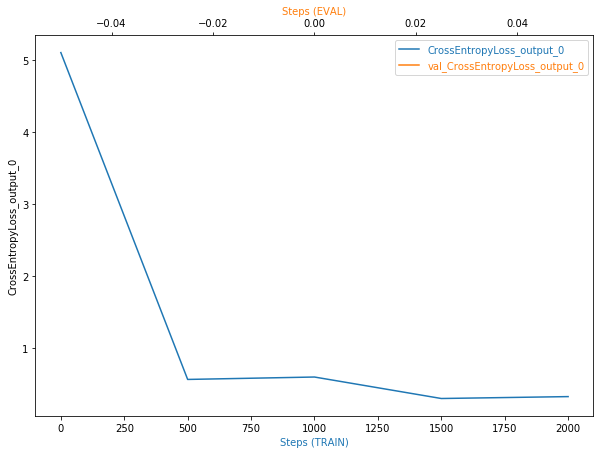

In [14]:
#Plot a debugging output.
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot

def get_data(trial, tname, mode):
    tensor = trial.tensor(tname)
    steps = tensor.steps(mode=mode)
    vals = []
    for s in steps:
        vals.append(tensor.value(s, mode=mode))
    return steps, vals

def plot_tensor(trial, tensor_name):

    steps_train, vals_train = get_data(trial, tensor_name, mode=ModeKeys.TRAIN)
    print("loaded TRAIN data")
    steps_eval, vals_eval = get_data(trial, tensor_name, mode=ModeKeys.EVAL)
    print("loaded EVAL data")

    fig = plt.figure(figsize=(10, 7))
    host = host_subplot(111)

    par = host.twiny()

    host.set_xlabel("Steps (TRAIN)")
    par.set_xlabel("Steps (EVAL)")
    host.set_ylabel(tensor_name)

    (p1,) = host.plot(steps_train, vals_train, label=tensor_name)
    print("completed TRAIN plot")
    (p2,) = par.plot(steps_eval, vals_eval, label="val_" + tensor_name)
    print("completed EVAL plot")
    leg = plt.legend()

    host.xaxis.get_label().set_color(p1.get_color())
    leg.texts[0].set_color(p1.get_color())

    par.xaxis.get_label().set_color(p2.get_color())
    leg.texts[1].set_color(p2.get_color())

    plt.ylabel(tensor_name)

    plt.show()
    
plot_tensor(trial, "CrossEntropyLoss_output_0")

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

In [15]:
# TODO: Display the profiler output
from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts

system_metrics_reader = tj.get_systems_metrics_reader()
system_metrics_reader.refresh_event_file_list()

view_timeline_charts = TimelineCharts(
    system_metrics_reader,
    framework_metrics_reader=None,
    select_dimensions=["CPU", "GPU"],
    select_events=["total"],
)
rule_output_path = estimator.output_path + estimator.latest_training_job.job_name + "/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

[2021-12-26 03:01:23.412 datascience-1-0-ml-t3-medium-1abf3407f667f989be9d86559395:20 INFO metrics_reader_base.py:134] Getting 32 event files
select events:['total']
select dimensions:['CPU', 'GPU']
filtered_events:{'total'}
filtered_dimensions:{'CPUUtilization-nodeid:algo-1'}


You will find the profiler report in s3://sagemaker-us-east-1-442548746070/pytorch-training-2021-12-26-02-24-10-290/rule-output


In [16]:
! aws s3 ls {rule_output_path} --recursive
! aws s3 cp {rule_output_path} ./ --recursive

2021-12-26 02:57:51     386872 pytorch-training-2021-12-26-02-24-10-290/rule-output/ProfilerReport/profiler-output/profiler-report.html
2021-12-26 02:57:51     236915 pytorch-training-2021-12-26-02-24-10-290/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2021-12-26 02:57:46        192 pytorch-training-2021-12-26-02-24-10-290/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2021-12-26 02:57:46        200 pytorch-training-2021-12-26-02-24-10-290/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2021-12-26 02:57:46       2133 pytorch-training-2021-12-26-02-24-10-290/rule-output/ProfilerReport/profiler-output/profiler-reports/Dataloader.json
2021-12-26 02:57:46        127 pytorch-training-2021-12-26-02-24-10-290/rule-output/ProfilerReport/profiler-output/profiler-reports/GPUMemoryIncrease.json
2021-12-26 02:57:46        199 pytorch-training-2021-12-26-02-24-10-290/rule-output/ProfilerReport/profiler-output/profiler-re

In [17]:
# get the autogenerated folder name of profiler report
profiler_report_name = [
    rule["RuleConfigurationName"]
    for rule in estimator.latest_training_job.rule_job_summary()
    if "Profiler" in rule["RuleConfigurationName"]
][0]

## Model Deploying

In [31]:
!pip install torchvision==0.5.0 --no-cache-dir

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
     |████████████████████████████████| 4.0 MB 24.8 MB/s            
     |████████████████████████████████| 753.4 MB 98.7 MB/s             


In [28]:
# TODO: Deploy your model to an endpoint

predictor = estimator.deploy(initial_instance_count=1, instance_type="ml.t2.medium")

-----------!

In [38]:
# TODO: Run an prediction on the endpoint

import base64 # encode/decode image in base64
import json
import requests
import torch
import torchvision
import PIL
import torchvision.transforms as transforms
import numpy as np

transform = transforms.Compose([
        transforms.Resize(256),
        transforms.RandomCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

# Testing of images of own images, with results
#PIL_image = PIL.Image.open('testImages/reneedog.JPG') #128 smooth fox terrier
#PIL_image = PIL.Image.open('testImages/bulldog.JPG') #40 bulldog

PIL_image = PIL.Image.open('testImages/germansherpa.JPG') #71 german shepherd

image = transform(PIL_image)

payload = image.unsqueeze(dim=0)

response = predictor.predict(payload)

np.argmax(response) + 1

71

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()